# <center>Sentiment Analysis on Harvard University Reviews</center>


# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data)
    
    1.3 [Initial Exploration](#1.3-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Feature Engineering](#2.3-Feature-Engineering)

## 1. Importing Data & Libraries

### 1.1 Libraries

In [4]:
import pandas as pd

import functions

### 1.2 Data

In [5]:
data = pd.read_csv('/Users/antoniooliveira/Projects/Industrial Applications of AI/Assignment 4/harvard_reviews.csv')
data.head(3)

,published_date,published_platform,rating,type,helpful_votes,title,text
0,2023-12-28T08:02:14-05:00,Mobile,5,review,0,Best classes and good environment,Good thanks for everything good work group 👍 h...
1,2023-12-12T00:38:26-05:00,Desktop,4,review,0,Harvard University,Harvard University was founded in 1636 and is ...
2,2023-12-10T08:21:35-05:00,Mobile,3,review,0,Walk around campus,We did a walk around most of the Harvard Campu...


### 1.3 Initial Exploration

**Describe & Info**

In [6]:
data.describe()

,rating,helpful_votes
count,3184.000000,3184.000000
mean,4.456658,0.498744
std,0.744024,2.819638
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,111.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      3184 non-null   object
 1   published_platform  3184 non-null   object
 2   rating              3184 non-null   int64 
 3   type                3184 non-null   object
 4   helpful_votes       3184 non-null   int64 
 5   title               3184 non-null   object
 6   text                3184 non-null   object
dtypes: int64(2), object(5)
memory usage: 174.2+ KB


**Unique Values**

In [8]:
data.nunique()

published_date        3184
published_platform       2
rating                   5
type                     1
helpful_votes           15
title                 2891
text                  3184
dtype: int64

In [9]:
list_ = ['published_platform', 'rating', 'type', 'helpful_votes']

for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")



Unique values in column 'published_platform': 
 ['Mobile' 'Desktop'] 


Unique values in column 'rating': 
 [5 4 3 1 2] 


Unique values in column 'type': 
 ['review'] 


Unique values in column 'helpful_votes': 
 [  0   2   1   3  91   4  19  48   5   7   8   6 111  14  10] 




Since the variable *type* is always the same, it will be dropped.

In [10]:
data = data.drop('type', axis = 1)

## 2 Exploratory Data Analysis

### 2.1 Missing Values

In [11]:
data.isnull().sum()

published_date        0
published_platform    0
rating                0
helpful_votes         0
title                 0
text                  0
dtype: int64

### 2.2 Duplicates

In [12]:
data[data.duplicated()]

,published_date,published_platform,rating,helpful_votes,title,text


### 2.3 Feature Engineering

**Published Date**

In [13]:
# Transforming published_date to datetime and setting all observations to the same timezone
data['published_date'] = pd.to_datetime(data['published_date'], utc=True)
#data['published_date'] = pd.to_datetime(data['published_date'], format='%Y-%m-%dT%H:%M:%S%z')
data['published_date']

0      2023-12-28 13:02:14+00:00
1      2023-12-12 05:38:26+00:00
2      2023-12-10 13:21:35+00:00
3      2023-11-08 02:20:21+00:00
4      2023-10-02 21:40:42+00:00
                  ...           
3179   2010-10-29 09:47:57+00:00
3180   2010-08-23 10:08:51+00:00
3181   2010-08-23 04:06:41+00:00
3182   2010-06-03 11:37:36+00:00
3183   2009-09-27 20:39:18+00:00
Name: published_date, Length: 3184, dtype: datetime64[ns, UTC]

Extracting Information from the converted variable *published_date*

In [14]:
data['Hour'] = data['published_date'].dt.dayofweek 
data['Day'] = data['published_date'].dt.day
data['Month'] = data['published_date'].dt.month
data['Year'] = data['published_date'].dt.year
data['Timezone'] = data['published_date'].dt.tz


### 2.3 Outliers

## 3. Text Preprocessing

Having noticed that there are non-English Reviews, the language in each review will now be detected through the usage of the langdetect library

**Language Detection**

In [17]:
data['language'] = data['text'].apply(functions.detect_language)

Listing the Unique Values of Language

In [18]:
list_ = ['language']
for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")

Unique values in column 'language': 
 ['en' 'de' 'pt' 'es' 'ja' 'fr' 'it' 'pl' 'tr' 'el' 'ru' 'nl' 'sv' 'ko'
 'no' 'id' 'zh-cn' 'hu' 'ar' 'he' 'da' 'zh-tw' 'th' 'sk'] 




Displaying the Number of Observations per Language

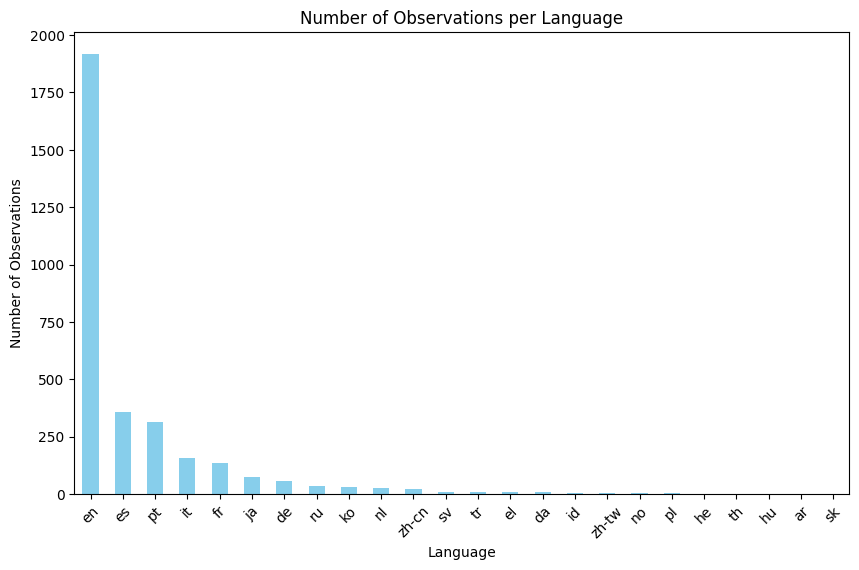

In [27]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Count observations by language
language_counts = data['language'].value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Observations per Language')
plt.xlabel('Language')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

Even though most observations are in English (~60%), it is worth it to try to translate the remaining observations, since they still constitute a significant part of the dataset.

To do so, I explored several options, such as *libretranslatepy*, *translate* libraries and APIs of Google and DeepL.

Since the libraries were not working, possibily because of the amount of text in each observation, I decided to experiment with the DeepL API, as follows.

In [ ]:
from deepl import DeepL
translator = DeepL(auth_key='14143fc8-d67d-487d-8605-a715b2691c9d:fx')

**Translation**

In [44]:
data = data.sample(50)
data.head(3)

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,translated_text,char_count
940,2016-02-20 16:16:07+00:00,Desktop,5,0,Student Led Tour,"We did a student tour of Harvard, well worth t...",5,20,2,2016,UTC,en,"We did a student tour of Harvard, well worth t...",122
1617,2013-06-23 09:40:15+00:00,Desktop,5,1,The cradle of American Liberal Arts Education!,"England has Oxbridge, the US has Harvard! Lov...",6,23,6,2013,UTC,en,"England has Oxbridge, the US has Harvard! Lov...",339
1594,2013-07-29 13:53:23+00:00,Desktop,5,0,A must-see,Harvard University is the main attraction in C...,0,29,7,2013,UTC,en,Harvard University is the main attraction in C...,332


In [43]:
# Calculate character counts for each row in the 'text' column
data['char_count'] = data['text'].str.len()

# Sum all character counts to get the total number of characters
total_char_count = data['char_count'].sum()

total_char_count

29976

In [ ]:
def translate_to_english(text, lang):
    if lang.lower() != 'en':  # Check if language code is not 'en' (English)
        translated_text = translator.translate(text, target_lang='EN')
        return translated_text
    else:
        return text